# Time Series Demo Code

INTRO
After learning some of the basics of time series analysis with Excel, we flip to very high powered example using a cutting edge Python module.
Adapted by Fred Woodaman, IDI/GMU. Originally authored by William Koehrsen (see below).

Note 1: Requires that you install quandl, which I had to do via terminal (Windows CMD) using pip install quandl.

Note 2: This entire example - with some changes to get it to run and to highlight some things - comes from https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
authored by https://towardsdatascience.com/@williamkoehrsen?source=user_popover

## Get car company stock data and conduct preliminary examination

In [6]:
# quandl for financial data
import quandl
# pandas for data manipulation
import pandas as pd
# numpy for arrays
import numpy as np
# matplotlib for plotting
import matplotlib
import matplotlib.pyplot as plt

# go to quandl and get your own login and get your own key - its free!
quandl.ApiConfig.api_key = 'ZKNEEP5F2KX3Gezgfnh7'

In [8]:
# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')
# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)
tesla.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


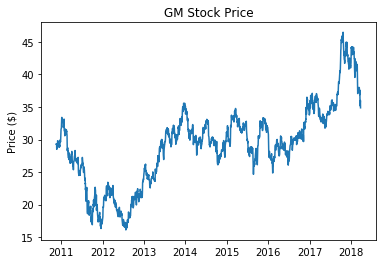

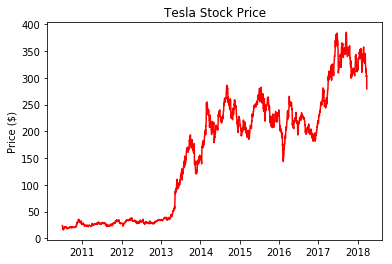

In [4]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)')
plt.show()
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)')
plt.show()

We've seen what the stock price data looks like.  But what are the respective companies worth?  GM sells roughly 30 times more cars.

## Comparing company total valuation

In [5]:
# Yearly average number of shares outstanding for Tesla - data from google
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
# Create a year column 
tesla['Year'] = tesla.index.year
# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']
    
tesla.head(5)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,1.218390e+09
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,1.215330e+09
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,1.119960e+09
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,9.792000e+08
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,8.216100e+08


In [5]:
# yearly avg share outstanding for GM - data from google
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}
# Create a year column 
gm['Year'] = gm.index.year
# Take Dates from index and move to Date column 
gm.reset_index(level=0, inplace = True)
gm['cap'] = 0# Calculate market cap for all years

for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.loc[i, 'cap'] = shares * gm.loc[i, 'Adj. Close']
    
gm.head(5)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10


In [6]:
# Merge the two datasets - just to compare the total capitalization - and rename the columns
cars = gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)
# Select only the relevant columns
cars = cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]
# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9
cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


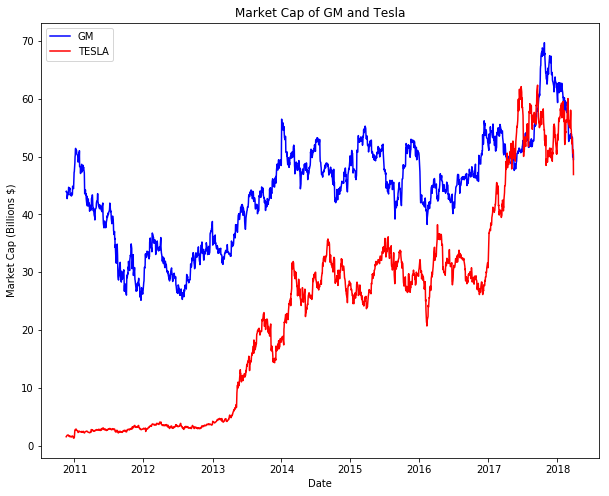

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
plt.legend()
plt.show()

In [8]:
# Find the first and last time Tesla was valued higher than GM
first_date = cars.loc[np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
last_date = cars.loc[np.max(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23.


## Forecasting future value

Great!  But can we expect this trend to continue?
Now we would like to forecast what the future might look like.  Facebook (yes, facebook) internally created a time series forecasting tool that employs all the bells and whistles.  See here: https://facebook.github.io/prophet/


Prophet installation required following command line:  conda install -c conda-forge fbprophet

In [9]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
gm = gm.rename(columns={'Date': 'ds', 'cap': 'y'})
# Put market cap in billions
gm['y'] = gm['y'] / 1e9
# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
gm_prophet.fit(gm)

# Make a future dataframe for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)
#type(gm_forecast)

In [10]:
# check to see what it produced
gm_forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-11-18,42.497085,42.497085,42.497085,42.076165,48.430939,2.721761,2.721761,2.721761,0.397179,...,0.0,0.0,0.0,0.050469,0.050469,0.050469,2.274112,2.274112,2.274112,45.218846
1,2010-11-19,42.523732,42.523732,42.523732,41.614682,48.407980,2.719059,2.719059,2.719059,0.397179,...,0.0,0.0,0.0,-0.004119,-0.004119,-0.004119,2.325999,2.325999,2.325999,45.242791
2,2010-11-22,42.603674,42.603674,42.603674,41.979820,48.923213,2.920312,2.920312,2.920312,0.397179,...,0.0,0.0,0.0,0.028573,0.028573,0.028573,2.494559,2.494559,2.494559,45.523986
3,2010-11-23,42.630322,42.630322,42.630322,42.138045,48.961611,2.920468,2.920468,2.920468,0.397179,...,0.0,0.0,0.0,-0.026670,-0.026670,-0.026670,2.549959,2.549959,2.549959,45.550790
4,2010-11-24,42.656969,42.656969,42.656969,42.281362,48.827148,3.050567,3.050567,3.050567,0.397179,...,0.0,0.0,0.0,0.051042,0.051042,0.051042,2.602346,2.602346,2.602346,45.707536


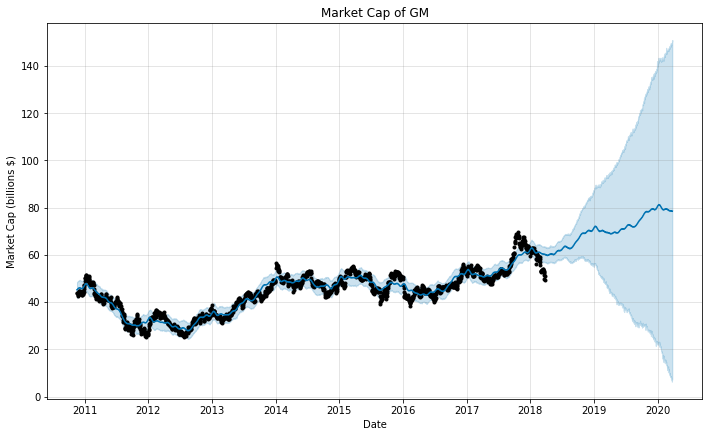

In [11]:
# note that Prophet has its own plot methods
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of GM')
plt.show()


A key part of how Prophet works is by looking for changepoints - where the trend changed substantially.  These can be specified, or you can let if find them on its own (what we are doing here).

In [12]:
# let's take a look at those change points
gm_changepoints = gm_prophet.changepoints
gm_changepoints[:10]

59    2011-02-14
118   2011-05-10
177   2011-08-03
236   2011-10-26
296   2012-01-24
355   2012-04-18
414   2012-07-12
473   2012-10-04
532   2013-01-02
591   2013-03-28
Name: ds, dtype: datetime64[ns]

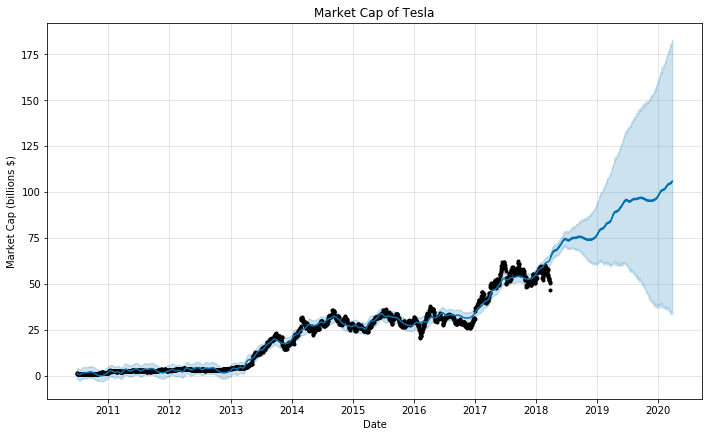

In [13]:
# now its Tesla's turn
# Prophet requires columns ds (Date) and y (value)
tesla = tesla.rename(columns={'Date': 'ds', 'cap': 'y'})

# Put market cap in billions
tesla['y'] = tesla['y'] / 1e9

# Make the prophet model and fit on the data
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
tesla_prophet.fit(tesla)

# Make a future dataframe for 2 years
tesla_forecast = tesla_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# Make predictions
tesla_forecast = tesla_prophet.predict(tesla_forecast)

# plot
tesla_prophet.plot(tesla_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of Tesla')
plt.show()


In [14]:
#again... what does the forecast for tesla look like
tesla_forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-06-29,0.326663,0.326663,0.326663,-1.558752,4.503476,1.048263,1.048263,1.048263,-3.293605,...,0.0,0.0,0.0,-0.153310,-0.153310,-0.153310,4.495179,4.495179,4.495179,1.374926
1,2010-06-30,0.377397,0.377397,0.377397,-1.752313,4.480617,0.967029,0.967029,0.967029,-3.293605,...,0.0,0.0,0.0,-0.126475,-0.126475,-0.126475,4.387110,4.387110,4.387110,1.344426
2,2010-07-01,0.428131,0.428131,0.428131,-1.948020,4.269769,0.792044,0.792044,0.792044,-3.293605,...,0.0,0.0,0.0,-0.187780,-0.187780,-0.187780,4.273429,4.273429,4.273429,1.220176
3,2010-07-02,0.478865,0.478865,0.478865,-1.976023,4.026925,0.650801,0.650801,0.650801,-3.293605,...,0.0,0.0,0.0,-0.211227,-0.211227,-0.211227,4.155634,4.155634,4.155634,1.129667
4,2010-07-06,0.681802,0.681802,0.681802,-2.322787,4.084437,0.227473,0.227473,0.227473,-3.293605,...,0.0,0.0,0.0,-0.153310,-0.153310,-0.153310,3.674389,3.674389,3.674389,0.909275


In [15]:
# double checking tesla's changepoints
tesla_prophet.changepoints.head()

62    2010-09-27
125   2010-12-27
187   2011-03-25
249   2011-06-23
312   2011-09-22
Name: ds, dtype: datetime64[ns]

## Compare Tesla's change points from the model to google search history trends for Tesla


Note:  you have to go out and get the Tesla search history from here: https://trends.google.com/trends/explore?date=2010-09-01%202018-08-19&q=Tesla%20Motors.  Its current in the folder.

In [16]:
#  here's original code from the website - and you will see the errors.

# further below is where I try to fix it - unsuccessfully 

# Load in the data 
tesla_search = pd.read_csv('tesla_search_terms.csv')
# Convert month to a datetime
tesla_search['Month'] = pd.to_datetime(tesla_search['Month'])
tesla_changepoints = [str(date) for date in tesla_prophet.changepoints]
# check the column labels
tesla_search.head()

,Month,Tesla Motors: (Worldwide)
0,2010-09-01,27
1,2010-10-01,31
2,2010-11-01,30
3,2010-12-01,23
4,2011-01-01,32


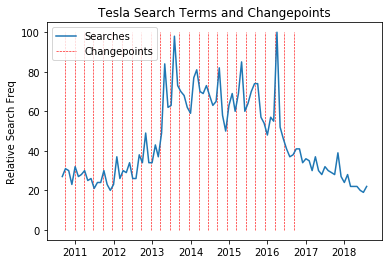

In [17]:
# aha!  now we know the names of the column labels
# Plot the search frequency
plt.plot(tesla_search['Month'], tesla_search['Tesla Motors: (Worldwide)'], label = 'Searches')
# Plot the changepoints
plt.vlines(tesla_changepoints, ymin = 0, ymax= 100, colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')
# Formatting of plot
plt.grid('off'); plt.ylabel('Relative Search Freq'); plt.legend()
plt.title('Tesla Search Terms and Changepoints')
plt.show()

In [18]:
gm_names = ['gm_%s' % column for column in gm_forecast.columns]
tesla_names = ['tesla_%s' % column for column in tesla_forecast.columns]
# Dataframes to merge
merge_gm_forecast = gm_forecast.copy()
merge_tesla_forecast = tesla_forecast.copy()
# Rename the columns
merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names
# Merge the two datasets
forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')
# Rename date column
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)


In [19]:
forecast.head()

,Date,gm_trend,gm_trend_lower,gm_trend_upper,gm_yhat_lower,gm_yhat_upper,gm_additive_terms,gm_additive_terms_lower,gm_additive_terms_upper,gm_daily,...,tesla_multiplicative_terms,tesla_multiplicative_terms_lower,tesla_multiplicative_terms_upper,tesla_weekly,tesla_weekly_lower,tesla_weekly_upper,tesla_yearly,tesla_yearly_lower,tesla_yearly_upper,tesla_yhat
0,2010-11-18,42.497085,42.497085,42.497085,42.076165,48.430939,2.721761,2.721761,2.721761,0.397179,...,0.0,0.0,0.0,-0.187780,-0.187780,-0.187780,-4.041082,-4.041082,-4.041082,0.008450
1,2010-11-19,42.523732,42.523732,42.523732,41.614682,48.407980,2.719059,2.719059,2.719059,0.397179,...,0.0,0.0,0.0,-0.211227,-0.211227,-0.211227,-4.094083,-4.094083,-4.094083,-0.017264
2,2010-11-22,42.603674,42.603674,42.603674,41.979820,48.923213,2.920312,2.920312,2.920312,0.397179,...,0.0,0.0,0.0,-0.144609,-0.144609,-0.144609,-4.243784,-4.243784,-4.243784,0.051856
3,2010-11-23,42.630322,42.630322,42.630322,42.138045,48.961611,2.920468,2.920468,2.920468,0.397179,...,0.0,0.0,0.0,-0.153310,-0.153310,-0.153310,-4.290248,-4.290248,-4.290248,0.047424
4,2010-11-24,42.656969,42.656969,42.656969,42.281362,48.827148,3.050567,3.050567,3.050567,0.397179,...,0.0,0.0,0.0,-0.126475,-0.126475,-0.126475,-4.334831,-4.334831,-4.334831,0.080410


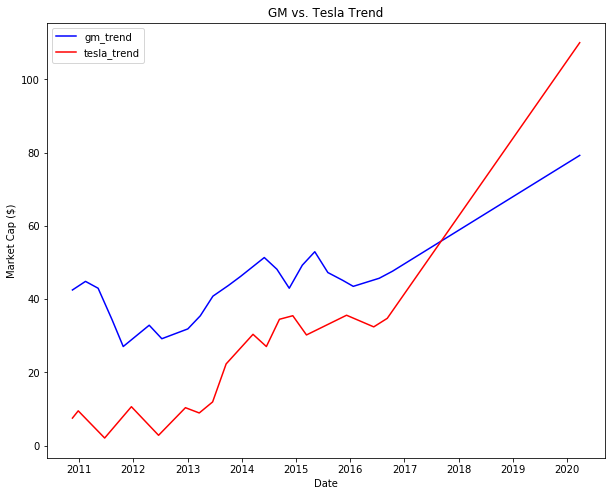

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_trend'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap ($)')
plt.title('GM vs. Tesla Trend')
plt.show()

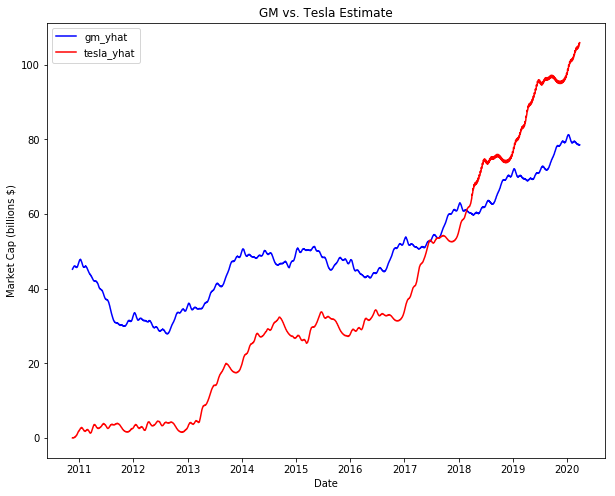

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)')
plt.title('GM vs. Tesla Estimate');
plt.show()

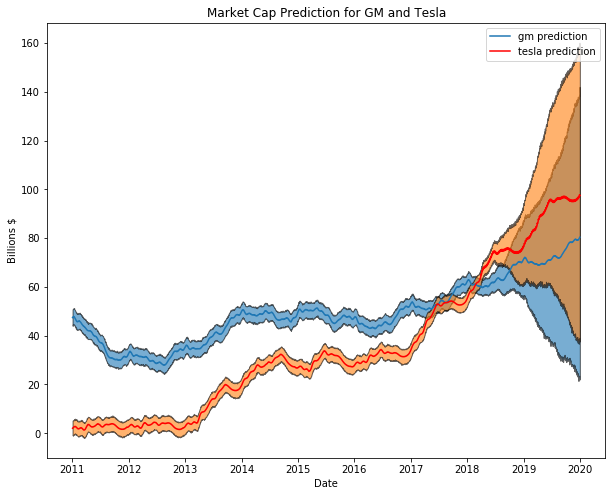

In [22]:
# Only keep years 2011 onwards and from before 2020
forecast = forecast[forecast['Date'] > '2010-12-31']
forecast = forecast[forecast['Date'] < '2020-01-01']
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 8));

# Plot estimate
ax.plot(forecast['Date'], forecast['gm_yhat'], label = 'gm prediction');

# Plot uncertainty values
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['gm_yhat_upper'], forecast['gm_yhat_lower'], alpha=0.6, edgecolor = 'k');

# Plot estimate and uncertainty for tesla
ax.plot(forecast['Date'], forecast['tesla_yhat'], 'r', label = 'tesla prediction');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['tesla_yhat_upper'], forecast['tesla_yhat_lower'], alpha=0.6, edgecolor = 'k');
plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); 
plt.title('Market Cap Prediction for GM and Tesla'); plt.show()

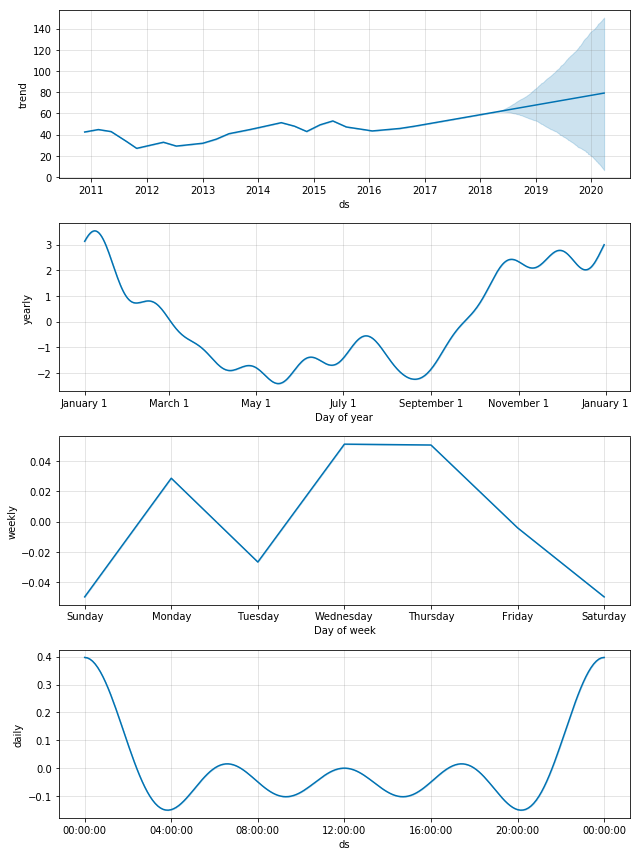

In [23]:
# Plot the trends and patterns
gm_prophet.plot_components(gm_forecast)